In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Initial Inspection (Task a & b)

In [2]:
# Load the dataset using a semicolon (;) as the separator as specified
df = pd.read_csv('student-mat.csv', sep=';')

print("--- Initial Data Inspection ---")
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame information (Columns and Data Types):")
# Check for missing values and data types
print(df.info())


--- Initial Data Inspection ---
First 5 rows of the DataFrame:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

DataFrame information (C

# 2. Data Cleaning (Task c)

In [3]:
# Check and remove duplicate entries
initial_rows = len(df)
df = df.drop_duplicates()
removed_rows = initial_rows - len(df)
print(f"\n--- Data Cleaning ---")
print(f"Number of duplicate rows found and removed: {removed_rows}")
if removed_rows == 0:
    print("No duplicates found, DataFrame size remains 395 rows.")


--- Data Cleaning ---
Number of duplicate rows found and removed: 0
No duplicates found, DataFrame size remains 395 rows.


# 3. Data Analysis Questions (Task d)

# Data Analysis Results

# Q1: What is the average score in math (G3)?

In [4]:
avg_g3 = df['G3'].mean()
print(f"1. Average final score (G3): {avg_g3:.2f}")

1. Average final score (G3): 10.42


# Q2: How many students scored above 15 in their final grade (G3)?

In [5]:
students_above_15 = df[df['G3'] > 15].shape[0]
print(f"2. Number of students who scored above 15 in G3: {students_above_15}")

2. Number of students who scored above 15 in G3: 40


# Q3: Is there a correlation between study time (studytime) and the final grade (G3)?

In [6]:
correlation = df['studytime'].corr(df['G3'])
print(f" Correlation between study time and final grade (G3): {correlation:.2f}")

 Correlation between study time and final grade (G3): 0.10


# Q4: Which gender has a higher average final grade (G3)?

In [8]:
avg_g3_by_gender = df.groupby('sex')['G3'].mean().sort_values(ascending=False)
print("\n4. Average final grade (G3) by gender:")
print(avg_g3_by_gender)


4. Average final grade (G3) by gender:
sex
M    10.914439
F     9.966346
Name: G3, dtype: float64


# 4. Data Visualization (Task e)

In [9]:
# Set a style for better plot aesthetics
sns.set_style("whitegrid")

# 4.1. Histogram of G3 (Final Grade Distribution)

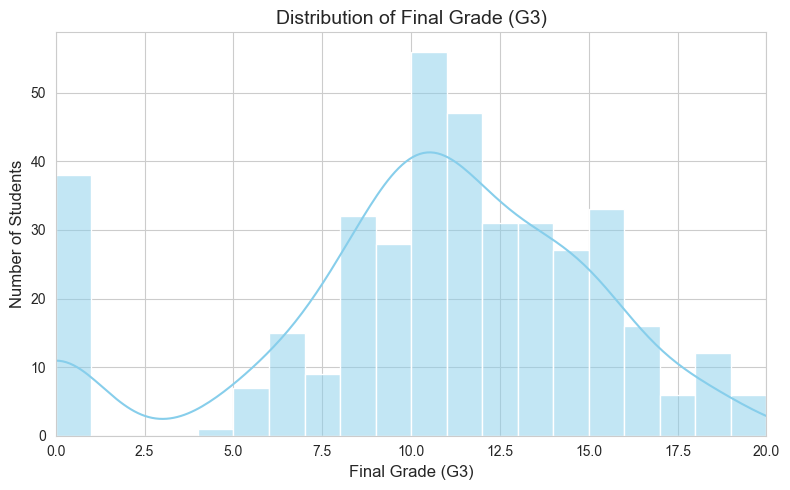

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Final Grade (G3)', fontsize=14)
plt.xlabel('Final Grade (G3)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xlim(0, 20)
plt.tight_layout()
plt.show() 

# 4.2. scatter plot between study time (study time) and final grade (G3)

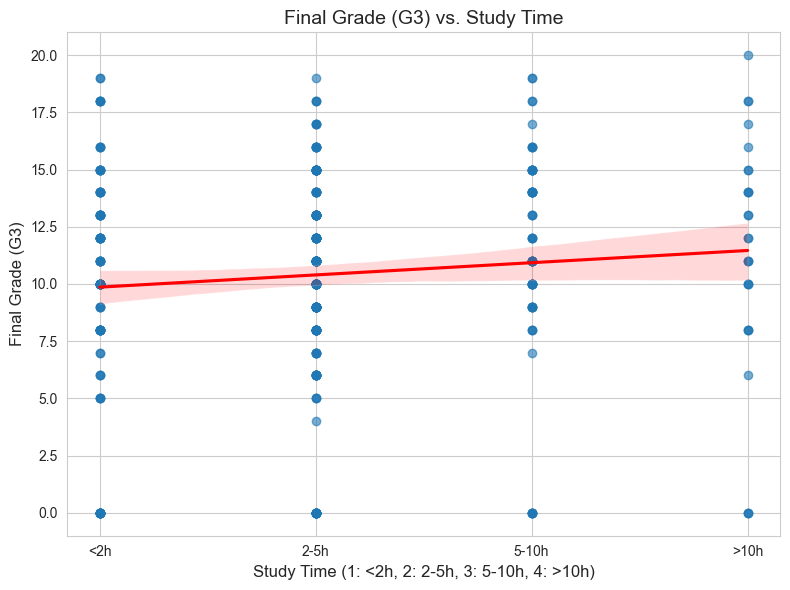

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(x='studytime', y='G3', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Final Grade (G3) vs. Study Time', fontsize=14)
plt.xlabel('Study Time (1: <2h, 2: 2-5h, 3: 5-10h, 4: >10h)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.xticks([1, 2, 3, 4], ['<2h', '2-5h', '5-10h', '>10h'])
plt.tight_layout()
plt.show()

# 4.3.bar chart comparing the average scores of male and female students

C:\Users\kumara\AppData\Local\Temp\ipykernel_10672\3007174356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='Average G3', data=avg_g3_by_gender, palette={'M': 'lightcoral', 'F': 'lightgreen'})


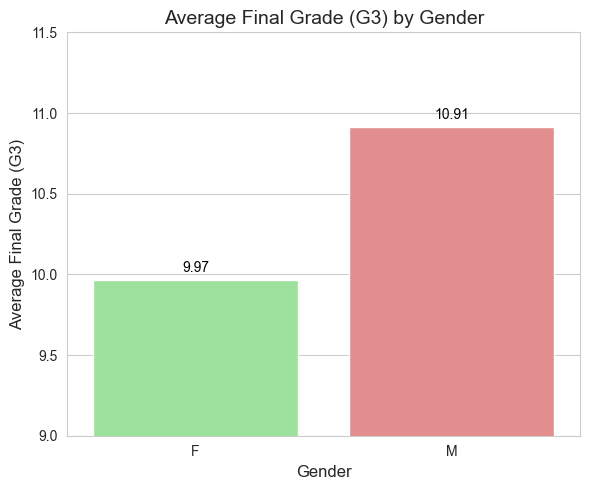

In [15]:
avg_g3_by_gender = df.groupby('sex')['G3'].mean().reset_index()
avg_g3_by_gender = avg_g3_by_gender.rename(columns={'G3': 'Average G3'})

plt.figure(figsize=(6, 5))
# Create the bar plot
sns.barplot(x='sex', y='Average G3', data=avg_g3_by_gender, palette={'M': 'lightcoral', 'F': 'lightgreen'})
plt.title('Average Final Grade (G3) by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.ylim(9.0, 11.5) # Set y-limit to better show the difference

# Add the exact average values on top of the bars
for index, row in avg_g3_by_gender.iterrows():
    plt.text(row.name, row['Average G3'] + 0.05, f"{row['Average G3']:.2f}",
             color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()